In [2]:
import numpy as np
import fenics
import matplotlib.pyplot as plt
from fenics_function_smoother import FenicsFunctionSmoother

In [3]:
n=40
smoothing_times = [1e-4, 1e-3, 1e-2]

Text(0.5, 1.0, 'unsmoothed')

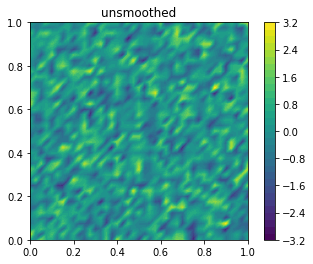

In [9]:
mesh = fenics.UnitSquareMesh(40,40)
V = fenics.FunctionSpace(mesh, 'CG', 1)

f = fenics.Function(V)
f_vec = np.random.randn(V.dim())
f.vector()[:] = f_vec

plt.figure()
c = fenics.plot(f)
plt.colorbar(c)
plt.title('unsmoothed')

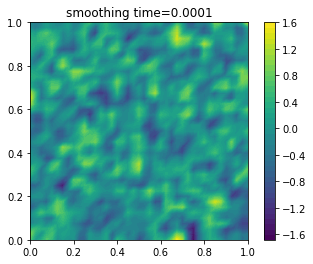

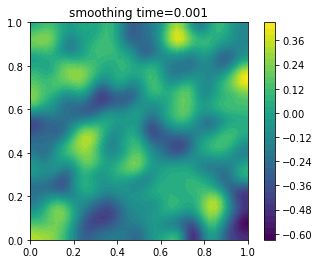

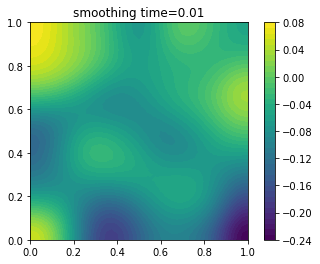

In [10]:
for smoothing_time in smoothing_times:
    smoother = FenicsFunctionSmoother(V, smoothing_time=smoothing_time)

    f.vector()[:] = f_vec
    smoother.smooth(f)

    plt.figure()
    c = fenics.plot(f)
    plt.colorbar(c)
    plt.title('smoothing time=' + str(smoothing_time))